In [1]:
import sklearn

from sklearn import metrics
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_iris

data = load_iris()

In [4]:
df = pd.DataFrame({'sepal-length' : data['data'][:,0], 'sepal-width' : data['data'][:,1], 'petal-length' : data['data'][:,2], 'petal-width' : data['data'][:,3], 'class' : data['target']})

df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df['class'] = df['class'].replace({ 0 : data['target_names'][0], 1: data['target_names'][1], 2:data['target_names'][2]})

In [6]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.shape

(150, 5)

In [8]:
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,7.2,3.6,6.1,2.5,virginica
1,5.6,2.7,4.2,1.3,versicolor
2,7.3,2.9,6.3,1.8,virginica
3,6.1,3.0,4.6,1.4,versicolor
4,5.2,4.1,1.5,0.1,setosa


In [9]:
df.shape

(150, 5)

In [10]:
df['class'].unique()

array(['virginica', 'versicolor', 'setosa'], dtype=object)

In [11]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

df['class'] = label_encoding.fit_transform(df['class'].astype(str))

df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,7.2,3.6,6.1,2.5,2
1,5.6,2.7,4.2,1.3,1
2,7.3,2.9,6.3,1.8,2
3,6.1,3.0,4.6,1.4,1
4,5.2,4.1,1.5,0.1,0


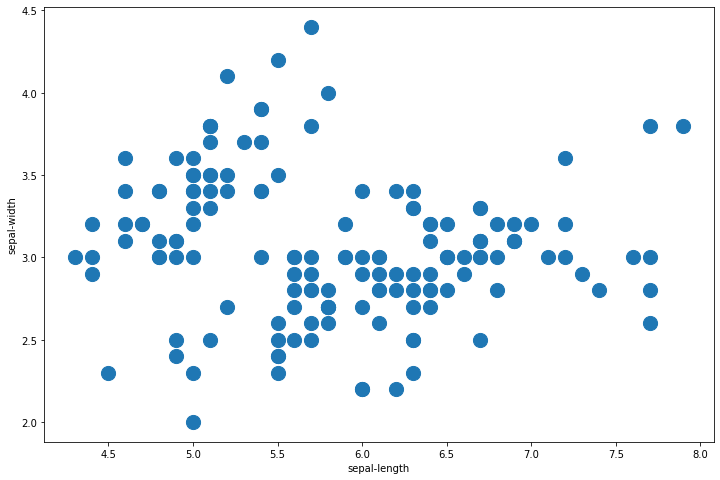

In [12]:
fig,ax = plt.subplots(figsize=(12,8))

plt.scatter(df['sepal-length'],df['sepal-width'],s=200)

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.show()

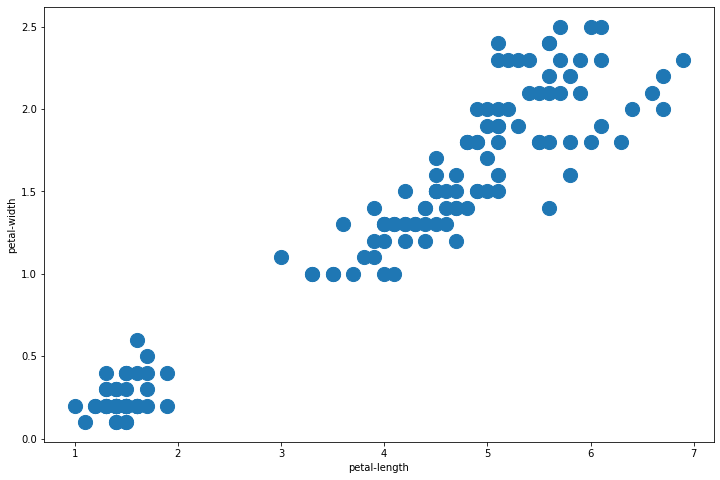

In [13]:
fig,ax = plt.subplots(figsize=(12,8))

plt.scatter(df['petal-length'],df['petal-width'],s=200)

plt.xlabel('petal-length')
plt.ylabel('petal-width')

plt.show()

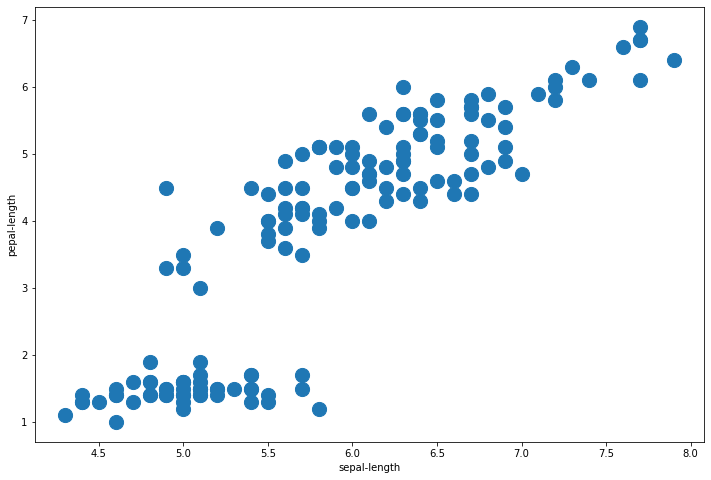

In [14]:
fig,ax = plt.subplots(figsize=(12,8))

plt.scatter(df['sepal-length'],df['petal-length'],s=200)

plt.xlabel('sepal-length')
plt.ylabel('pepal-length')

plt.show()

In [15]:
df_2D = df[['sepal-length','petal-length']]

df_2D.sample(5)

,sepal-length,petal-length
137,6.7,5.6
28,6.6,4.4
60,5.8,3.9
82,5.5,1.3
145,6.4,5.6


In [16]:
iris_2D = np.array(df_2D)

In [17]:
kmean_model = KMeans(n_clusters=3,max_iter=1000).fit(iris_2D)

In [18]:
kmean_model.labels_

array([1, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0,
       0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2,
       0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1,
       0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 2,
       1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 0, 2, 0,
       1, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1])

In [19]:
centroid = kmean_model.cluster_centers_

centroid

array([[5.87413793, 4.39310345],
       [6.83902439, 5.67804878],
       [5.00784314, 1.49215686]])

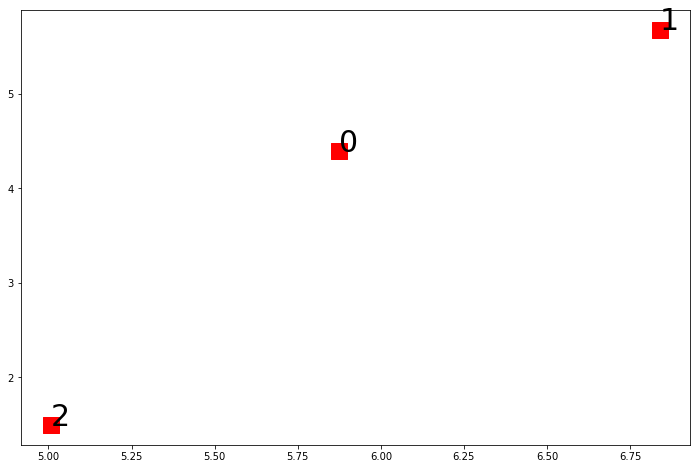

In [20]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(centroid[:,0],centroid[:,1],c='r',s=250,marker='s')

for i in range(len(centroid)):
    plt.annotate(i,(centroid[i][0], centroid[i][1]),fontsize=30)

plt.show()

In [21]:
labels = df['class']

In [22]:
print('Homogeneity_score: ',metrics.homogeneity_score(labels,kmean_model.labels_))

print('Completeness_score: ',metrics.completeness_score(labels,kmean_model.labels_))

print('v_measure_score: ',metrics.v_measure_score(labels,kmean_model.labels_))

print('AR_score: ',metrics.adjusted_rand_score(labels,kmean_model.labels_))

print('adjusted_mutual_info_score: ',metrics.adjusted_mutual_info_score(labels,kmean_model.labels_))

print('silhouette_score: ',metrics.silhouette_score(df,kmean_model.labels_))

Homogeneity_score:  0.7033177646052958
Completeness_score:  0.7096993707802843
v_measure_score:  0.706494157075837
AR_score:  0.6988627672348092
adjusted_mutual_info_score:  0.7028024531409133
silhouette_score:  0.5388007800309613


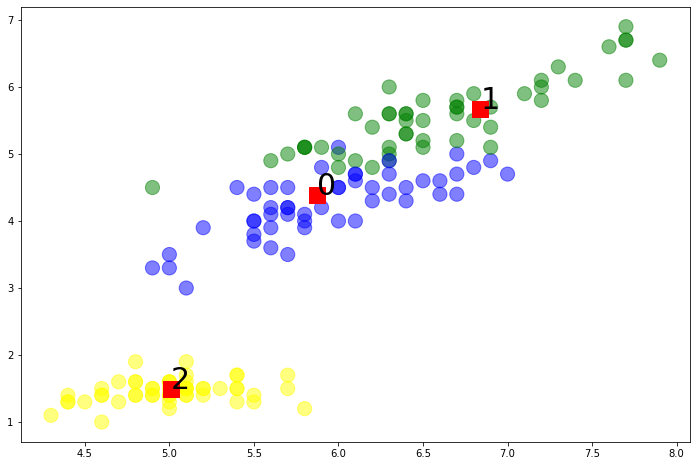

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
colors = ['yellow','blue','green']

plt.scatter(df['sepal-length'],df['petal-length'],c=df['class'],cmap=matplotlib.colors.ListedColormap(colors),alpha=0.5,s=200)

plt.scatter(centroid[:,0],centroid[:,1],c='r',s=250,marker='s')

for i in range(len(centroid)):
    plt.annotate(i,(centroid[i][0], centroid[i][1]),fontsize=30)

plt.show()

In [24]:
iris_features = df.drop('class',axis=1)

iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,7.2,3.6,6.1,2.5
1,5.6,2.7,4.2,1.3
2,7.3,2.9,6.3,1.8
3,6.1,3.0,4.6,1.4
4,5.2,4.1,1.5,0.1


In [25]:
iris_labels = df['class']

iris_labels.sample(5)

82     0
21     1
144    2
129    1
107    2
Name: class, dtype: int32

In [26]:
kmean_model = KMeans(n_clusters=3).fit(iris_features)

In [27]:
kmean_model.labels_

array([2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 0, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2,
       1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0,
       2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1,
       2, 1, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2])

In [28]:
kmean_model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [29]:
print('Homogeneity_score: ',metrics.homogeneity_score(labels,kmean_model.labels_))

print('Completeness_score: ',metrics.completeness_score(labels,kmean_model.labels_))

print('v_measure_score: ',metrics.v_measure_score(labels,kmean_model.labels_))

print('AR_score: ',metrics.adjusted_rand_score(labels,kmean_model.labels_))

print('adjusted_mutual_info_score: ',metrics.adjusted_mutual_info_score(labels,kmean_model.labels_))

print('silhouette_score: ',metrics.silhouette_score(iris_features,kmean_model.labels_))

Homogeneity_score:  0.7514854021988338
Completeness_score:  0.7649861514489815
v_measure_score:  0.7581756800057784
AR_score:  0.7302382722834697
adjusted_mutual_info_score:  0.7551191675800483
silhouette_score:  0.5528190123564101


In [30]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans


In [31]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,7.2,3.6,6.1,2.5,2
1,5.6,2.7,4.2,1.3,1
2,7.3,2.9,6.3,1.8,2
3,6.1,3.0,4.6,1.4,1
4,5.2,4.1,1.5,0.1,0


In [32]:
df = df.sample(frac=1).reset_index(drop=True)

In [33]:
features = df.drop('class',axis=1)
labels = df['class']

In [34]:
def build_model(clustering_model, data, labels):
    model = clustering_model(data)

    print('homo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

    print(50* '-')

    print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
    %(metrics.homogeneity_score(labels,model.labels_),
    metrics.completeness_score(labels,model.labels_),
    metrics.v_measure_score(labels,model.labels_),
    metrics.adjusted_rand_score(labels,model.labels_),
    metrics.adjusted_mutual_info_score(labels,model.labels_),
    metrics.silhouette_score(data,model.labels_)))

In [35]:
def k_means(data, n_clusters=3,max_iter=1000):
    model = KMeans(n_clusters=n_clusters,max_iter=max_iter).fit(data)
    return model

In [36]:
build_model(k_means,features,labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.751	0.765	0.758	0.730	0.755	0.553


In [37]:
def agglomerative(data, n_clusters=3):
    model = AgglomerativeClustering(n_clusters=n_clusters).fit(data)
    return model

In [38]:
build_model(agglomerative,features,labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.761	0.780	0.770	0.731	0.767	0.554


In [39]:
def dbscan(data, eps=0.45,min_samples=4):
    model = DBSCAN(eps=eps,min_samples=min_samples).fit(data)
    return model

In [40]:
build_model(dbscan,features,labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.577	0.609	0.593	0.508	0.584	0.372


In [41]:
def mean_shift_fn(data, bandwidth=0.85):
    model = MeanShift(bandwidth=bandwidth).fit(data)
    return model

In [42]:
build_model(mean_shift_fn,features,labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.760	0.772	0.766	0.744	0.763	0.551


In [43]:
def birch_fn(data,n_cluster=3):
    model = Birch(n_clusters=n_cluster).fit(data)
    return model

In [44]:
build_model(birch_fn,features,labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.630	0.798	0.704	0.564	0.700	0.534


In [45]:
def affinity_propagation_fn(data,damping=0.6,max_iter=1000):
    model = AffinityPropagation(damping=damping,max_iter=max_iter).fit(data)
    return model

In [46]:
build_model(affinity_propagation_fn,features,labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.851	0.492	0.624	0.439	0.613	0.345


In [47]:
def mini_batch_kmeans_fn(data,n_clusters=3,max_iter=1000):
    model = MiniBatchKMeans(n_clusters=n_clusters,max_iter=max_iter,batch_size=20).fit(data)
    return model

In [48]:
build_model(mini_batch_kmeans_fn,features,labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.743	0.759	0.751	0.717	0.748	0.553
